## Instructions

● Use Python or R to perform the tasks required.

● Write your solutions in the workspace provided from your certification page.

● Include all of the visualizations you create to complete the tasks.

● Visualizations must be visible in the published version of the workspace. Links to external visualizations will not be accepted.

● You do not need to include code unless the question says you must.

● You must pass all criteria to pass this exam. The full criteria can be found here.


## Introduction
GoalZone is a fitness club chain in Canada.

GoalZone offers a range of fitness classes in two capacities - 25 and 15.

Some classes are always fully booked. Fully booked classes often have a low attendance rate.

GoalZone wants to increase the number of spaces available for classes.

They want to do this by predicting whether the member will attend the class or not.

If they can predict a member will not attend the class, they can make another space available.


## Initialize and load data

The dataset contains each record when a member registered for a fitness class.

In [17]:
# import all needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the data - contains each record when a member registered for a fitness class.

df = pd.read_csv("fitness_class_2212.csv")

## Data Validation

**Original dataset**

In [18]:
# print the number of rows & columns
print("\nThe dataset has {} rows and {} columns.\n".format(df.shape[0], df.shape[1]))
# view the first few rows
df.head()


The dataset has 1500 rows and 8 columns.



,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


**Unique Values for Categorical Variables & MAX and MIN for Numeric Values**

In [20]:
# datasets columns with their unique and numeric values each

print("\nUnique categories:\n")
print("day_of_week: ", df.day_of_week.unique().tolist())
print("time: ", df.time.unique().tolist())
print("category: ", df.category.unique().tolist())
print("attended: ", df.attended.unique().tolist())

print("\nNumeric values:\n")
print("Max & min booking id: ", df.booking_id.max(), "&", df.booking_id.min())
print("Max & min months_as_member: ", df.months_as_member.max(), "&", df.months_as_member.min())
print("Max & min weight: ", df.weight.max(), "&", df.weight.min())
print("Max & min days_before: ", df.days_before.max(), "&", df.days_before.min(), "\n")


Unique categories:

day_of_week:  ['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue', 'Sat', 'Monday']
time:  ['PM', 'AM']
category:  ['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua']
attended:  [0, 1]

Numeric values:

Max & min booking id:  1500 & 1
Max & min months_as_member:  148 & 1
Max & min weight:  170.52 & 55.41
Max & min days_before:  9 & 1 



## 1. For every column in the data:

### a. State whether the values match the description given in the table above.

Based on the above data analysis, the following can be said:

| Column Name      | Criteria                                                                                                                                                            | Data matches the description |
| :---             | :---                                                                                                                                                                | :---
| booking_id       | Nominal. The unique identifier of the booking. Missing values are not possible due to the database structure.                                                       | Yes
| months_as_member | Discrete. The number of months as this fitness club member, minimum 1 month. Replace missing values with the overall average month.                                 | Yes
| weight           | Continuous. The member's weight in kg, rounded to 2 decimal places. The minimum possible value is 40.00 kg. Replace missing values with the overall average weight. | Yes, but missing values
| days_before      | Discrete. The number of days before the class the member registered, minimum 1 day. Replace missing values with 0.                                                  | Yes
| day_of_week      | Ordinal. The day of the week of the class. One of “Mon”, “Tue”, “Wed”, “Thu”, “Fri”, “Sat” or “Sun”. Replace missing values with “unknown”.                         | Yes
| time             | Ordinal. The time of day of the class. Either “AM” or “PM”. Replace missing values with “unknown”.                                                                  | Yes
| category         | Nominal. The category of the fitness class. One of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”. Replace missing values with “unknown”.                         | Yes, but missing values
| attended         | Nominal. Whether the member attended the class (1) or not (0). Missing values should be removed.                                                                    | Yes

Note: mangler at verificere at alle weight's rows har 2 decimal places.

### b. State the number of missing values in the column.

As seen below, the _weight_ column is missing values in 20 rows.

In [21]:
# the counts of missing values in each column
df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

It can also be seen in [22] that _category_ has "-" values.

### c. Describe what you did to make values match the description if they did not match.

The missing values in _weight_ are replaced with the overall average weight

In [22]:
df.weight.fillna(df.weight.mean(), inplace=True);
df.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

The "-" values in _category_ are replaced with "unknown".

In [23]:
df.category.replace(to_replace="-", value="Unknown", inplace=True);
df.category.unique().tolist()

['Strength', 'HIIT', 'Cycling', 'Yoga', 'Unknown', 'Aqua']

## 2. Create a visualization that shows how many bookings attended the class. Use the visualization to:

### a. State which category of the variable attended has the most observations

As seen the bar plot below, the HIIT category has the most attendance.

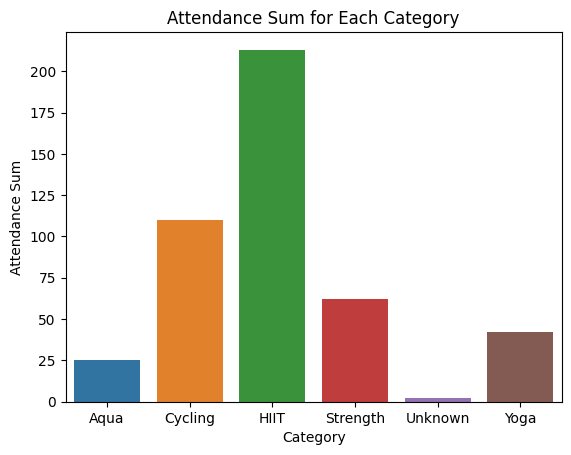

In [24]:
# a bar chart for counts of each day classes stayed full
category_attendance = df.groupby('category')['attended'].sum().reset_index()

sns.barplot(x='category', y='attended', data=category_attendance)
plt.title('Attendance Sum for Each Category')
plt.xlabel('Category')
plt.ylabel('Attendance Sum')
plt.show()

### b. Explain whether the observations are balanced across categories of the variable attended

From the bar plot, is is seen that the data is NOT balanced across categories, as there is significant difference between the most and least popular category.

## 3. Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.

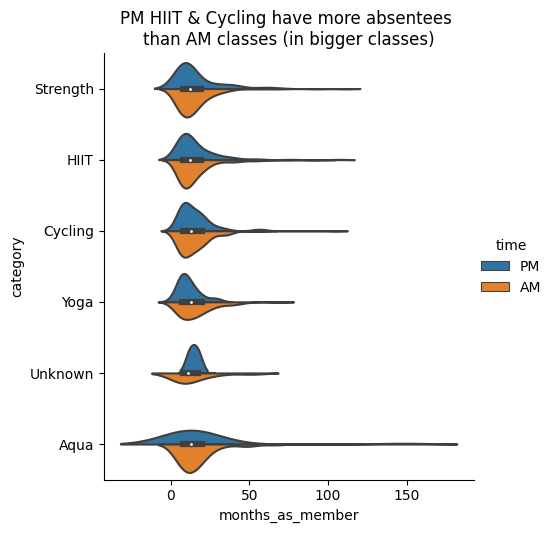

In [25]:
sns.catplot(data=df, 
            x='months_as_member', 
            y='category', 
            hue='time', 
            kind="violin", 
            split=True, 
            palette=["C0", "C1"])

plt.title('PM HIIT & Cycling have more absentees \nthan AM classes (in bigger classes)');

## 4. Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship.

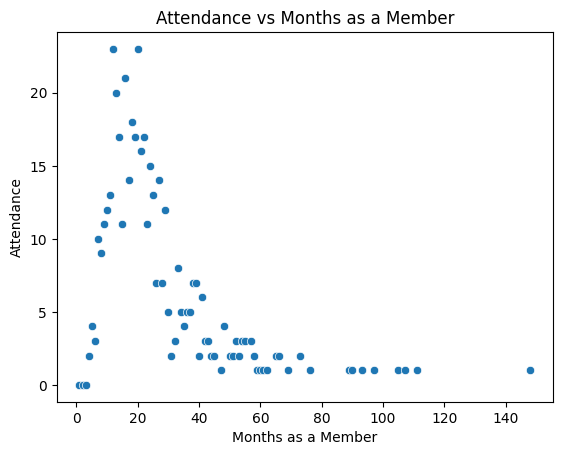

In [26]:
monthasmember_attendance = df.groupby('months_as_member')['attended'].sum().reset_index()

sns.scatterplot(x='months_as_member', y='attended', data=monthasmember_attendance)
plt.title('Attendance vs Months as a Member')
plt.xlabel('Months as a Member')
plt.ylabel('Attendance')
plt.show()

## 5. The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/clustering).

Answer: Regression.

![image.png](https://www.researchgate.net/profile/Frank-Nielsen-3/publication/314626729/figure/fig1/AS:810830673244160@1570328505835/The-three-pillars-of-learning-in-data-science-clustering-flat-or-hierarchical.ppm)

## 6. Fit a baseline model to predict whether members will attend using the data provided. You must include your code.

**My Prediction Models**

* **Regression Problem:** Predicting the attendance rate for each class is a regression problem in machine learning.
* I will use the **LinearRegression** as baseline model for its simplicity.
* Then, I will use the **LassoCV** model as a comparison model to see if cross validation and reduction of unnecessary parameters in the model can help produce better model than LinearRegression.

In [29]:
# Model Fitting
# LinearRegression, as a baseline model
# LassoCV, as a comparison model

# create dummy variables for category data
data = pd.get_dummies(df)
data.head()

,booking_id,months_as_member,weight,attended,days_before_1,days_before_1 days,days_before_10,days_before_10 days,days_before_11,days_before_12,...,day_of_week_Wed,day_of_week_Wednesday,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Unknown,category_Yoga
0,1,17,79.56,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,2,10,79.01,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,3,16,74.53,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,4,5,86.12,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,5,15,69.29,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


**Splitting the Dataset into Train & Test Datasets**

In [32]:
# import needed libraries

from sklearn import model_selection
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split

# split the data into X & y

X = data.drop('attended', axis=1)
y = data['attended']

# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=2023)

**Method 1: Linear Regression Model**

In [34]:
# train a simple linear regression model

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# predict

linreg_y_pred = linreg.predict(X_test)

**Method 2: Lasso Regression with CV Model**

In [35]:
# train a lasso model

lasso = LassoCV(n_alphas=10, cv=50)
lasso.fit(X_train, y_train)

# predict

lasso_y_pred = lasso.predict(X_test)

**Model Evaluation**

Evaluating My Models

* I will use  R2 Score as a metric to compare both models.  R2 Score is a simple and interpretable metric to evaluate regression models. A  R2 score can be between 0 to 1. Close to 1 score shows better fitted model.
* Finding: Using the  R2 Score, the LinearRegression model scored around 70% while the LassoCV model scored around 68%. Here, the LinearRegression model wins, but with slight lead over the LassoCV model.

In [36]:
# Model Evaluation
# R2 score, as a metric

# R2 score which lies between 0 to 1. Close to 1 score shows better fitted model

from sklearn.metrics import r2_score
print('\nLinearRegression r2 score:', r2_score(linreg_y_pred, y_test))
print('\nLassoCV r2 score:', r2_score(lasso_y_pred, y_test))


LinearRegression r2 score: -1.6030875430368554

LassoCV r2 score: -1.9500199571955346


## 7. Fit a comparison model to predict whether members will attend using the data provided. You must include your code.

## 8. Explain why you chose the two models used in parts 6 and 7.

## 9. Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code.

## 10. Explain which model performs better and why.